In [109]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns

In [110]:
# Load the dataset
df = pd.read_csv('apple_quality.csv')
df = df[:-1] # Remove the last row
df.drop('A_id', axis=1, inplace=True) # Drop the 'A_id' column as it seems to be an identifier
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [111]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.1+ KB


In [112]:
# Display summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [113]:
# Convert the 'Acidity' column to float
df.Acidity = df.Acidity.astype(float)

In [114]:
# Display updated summary statistics after converting 'Acidity' to float
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [115]:
# Display the count of each class in the 'Quality' column
df.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [116]:
# Map 'good' to 1 and 'bad' to 0 in the 'Quality' column
df.Quality = df.Quality.map({'good': 1, 'bad': 0})

In [117]:
# Display the count of each class in the 'Quality' column
df.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

Text(0.5, 0.98, 'Pair Plot of Apple Parameters by Quality')

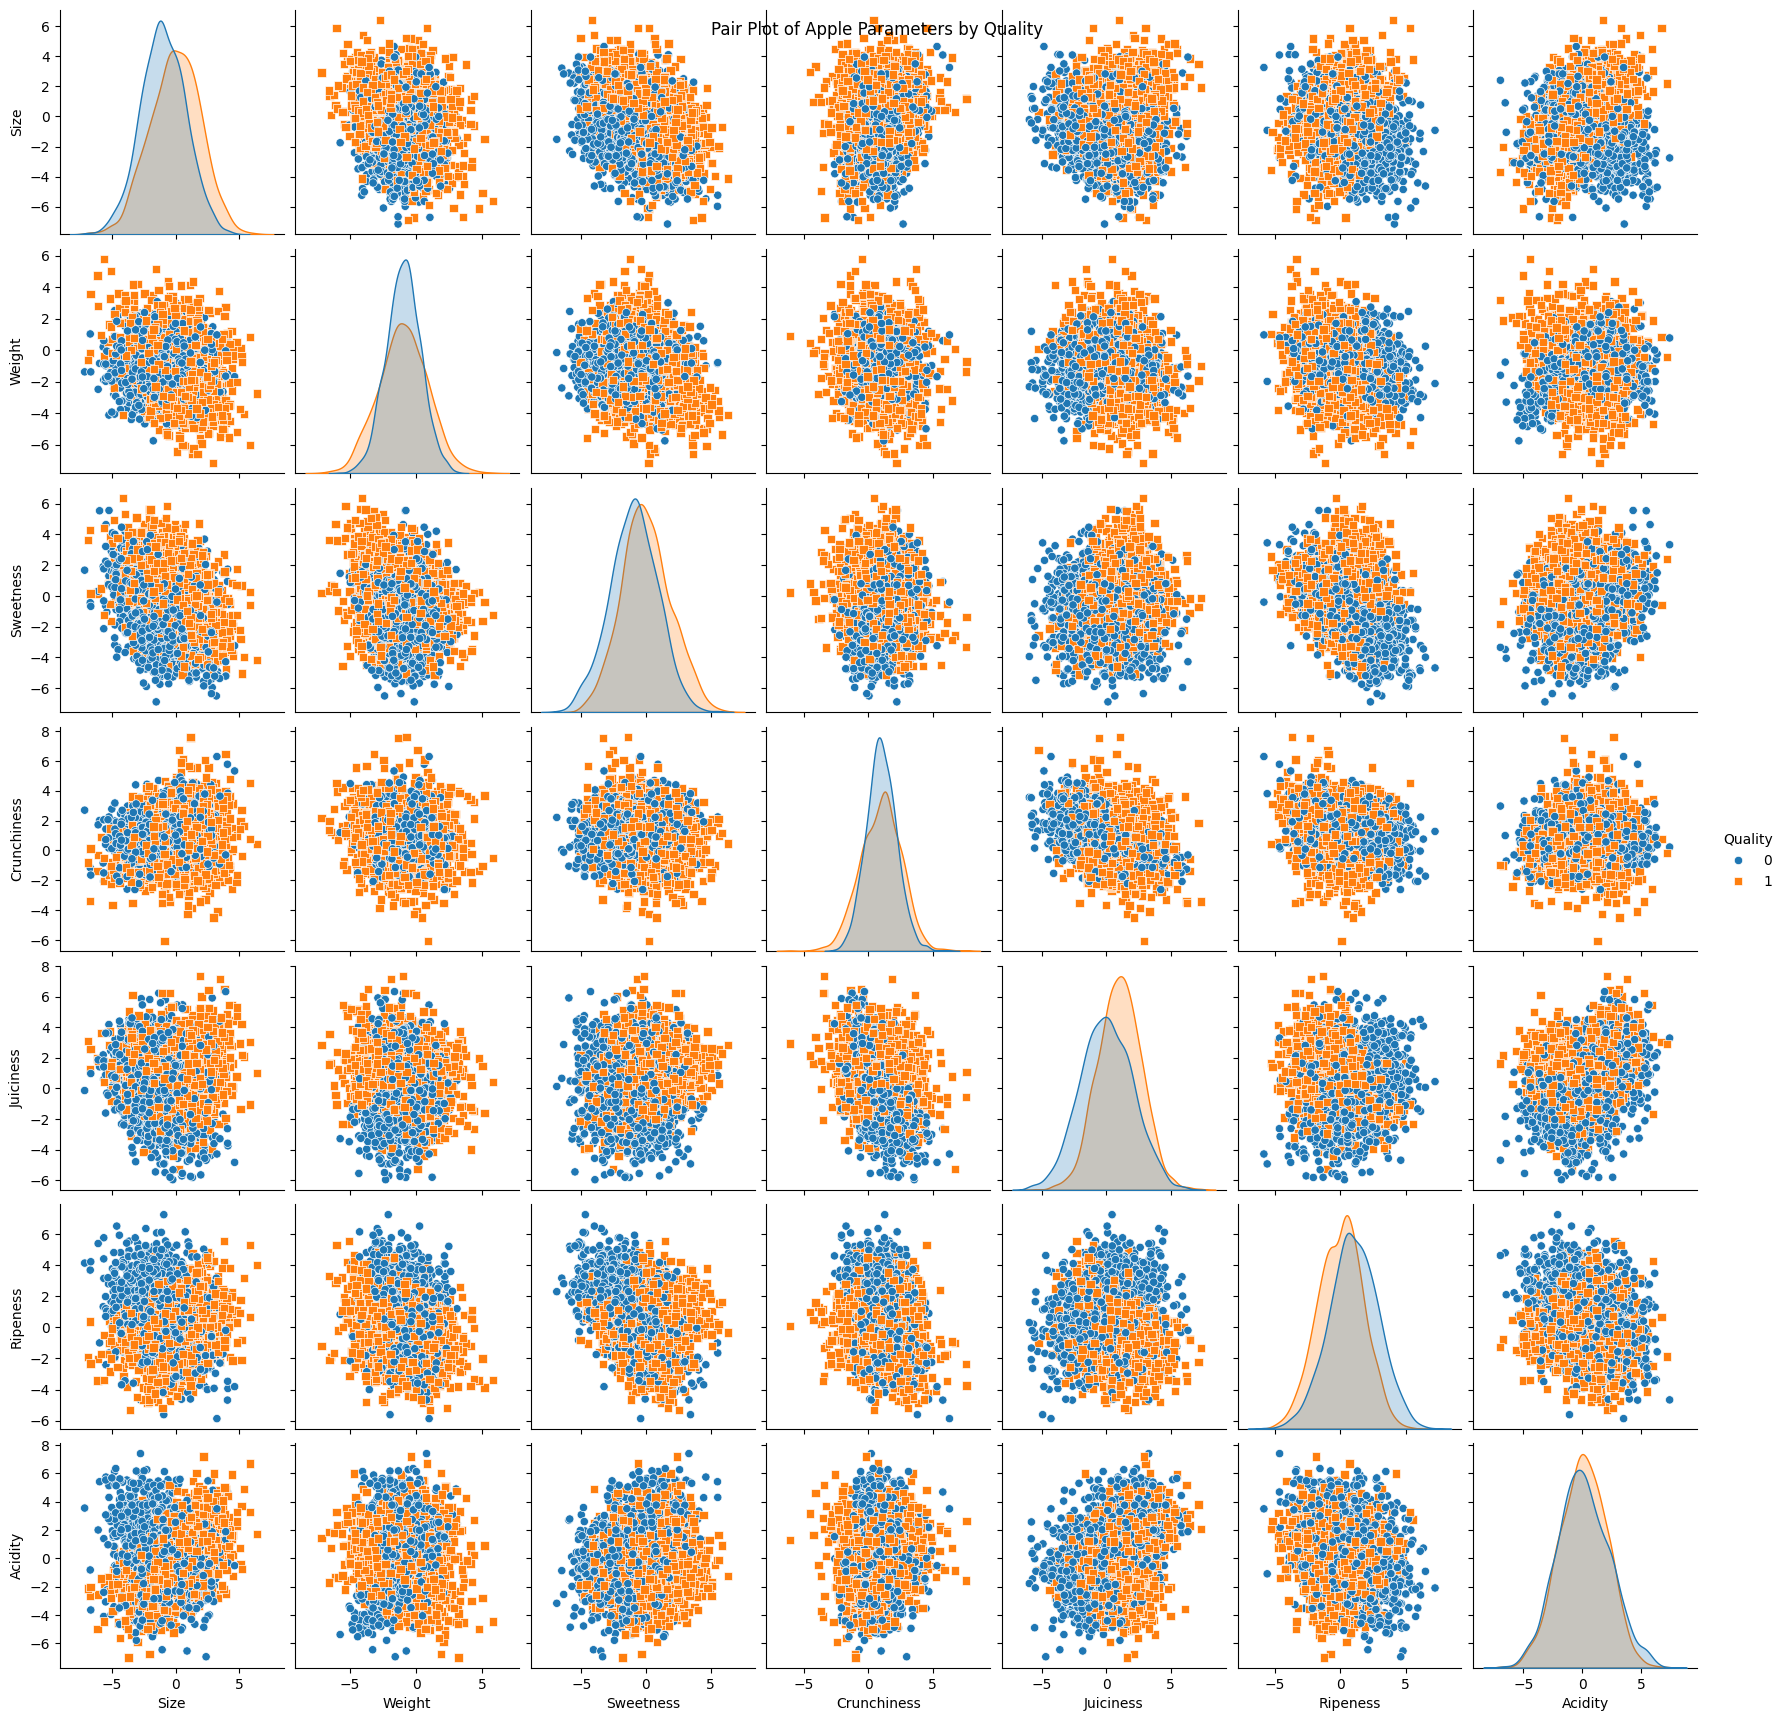

In [94]:
sns.pairplot(df, hue='Quality', markers=['o', 's'])
plt.suptitle('Pair Plot of Apple Parameters by Quality')

c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a futu

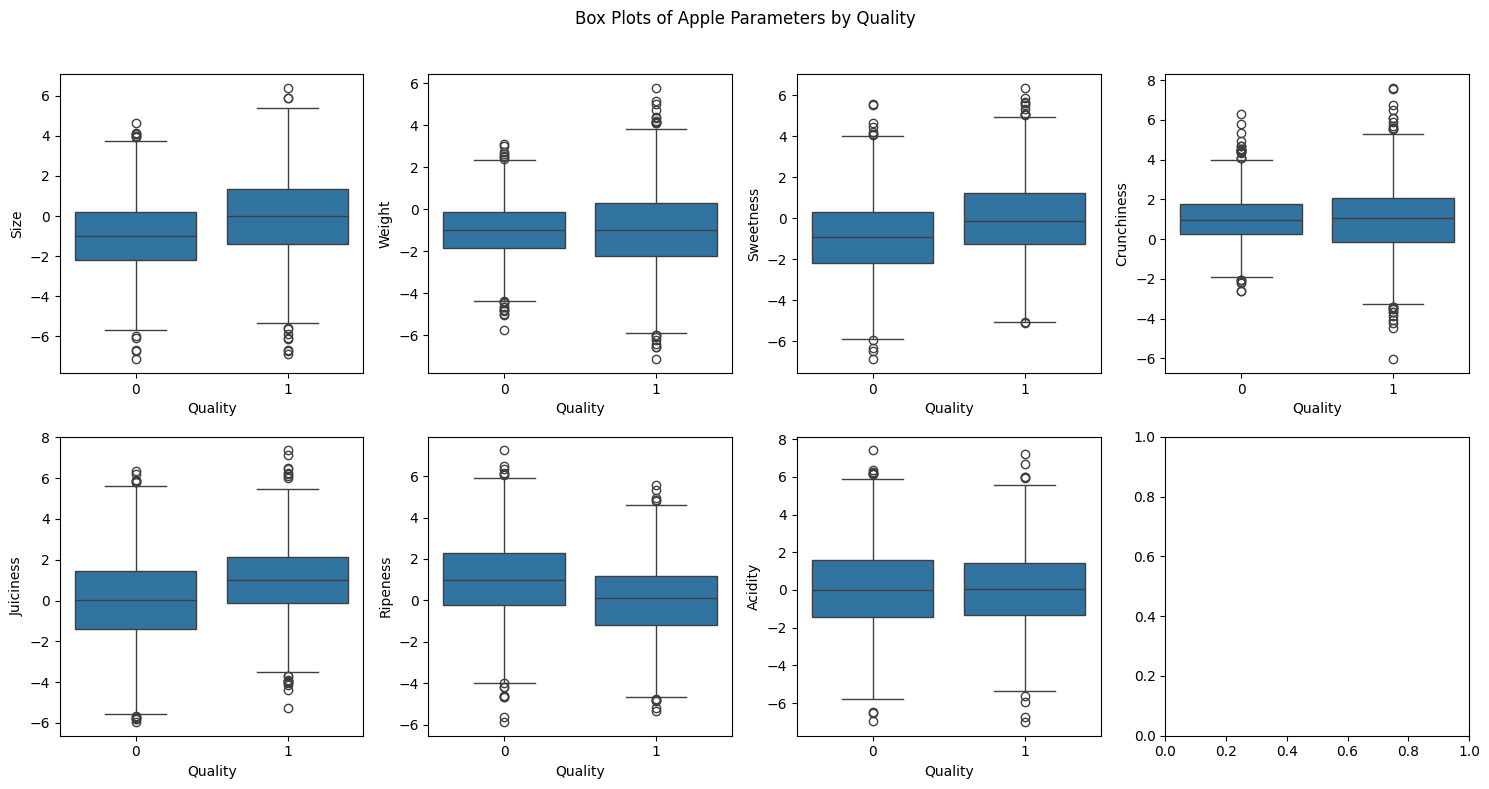

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for i, feature in enumerate(df.columns[:-1]):
    sns.boxplot(x='Quality', y=feature, data=df, ax=axes[i // 4, i % 4])
plt.suptitle('Box Plots of Apple Parameters by Quality')
plt.tight_layout(rect=[0, 0, 1, 0.96])

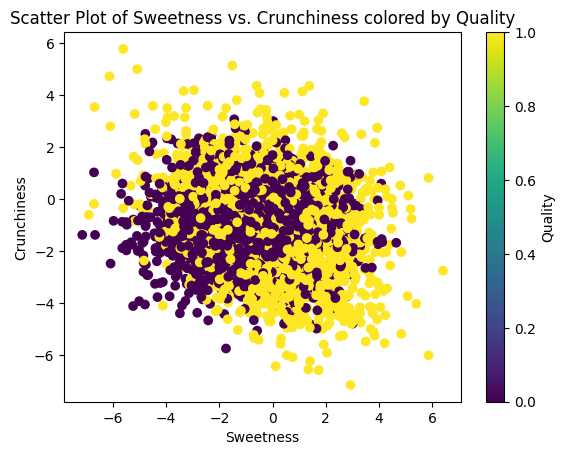

In [97]:
plt.scatter(df['Size'], df['Weight'], c=df['Quality'], cmap='viridis')
plt.xlabel('Sweetness')
plt.ylabel('Crunchiness')
plt.title('Scatter Plot of Sweetness vs. Crunchiness colored by Quality')
plt.colorbar(label='Quality')

In [106]:
# T-test and p-value for each feature to compare means between classes
for column in df.columns:
    if column != 'Quality':
        quality_0 = df[df['Quality'] == 0][column]
        quality_1 = df[df['Quality'] == 1][column]
        t_stat, p_value = ttest_ind(quality_0, quality_1)
        print(f"Column: {column}, t-statistic: {t_stat}, p-value: {p_value}")

Column: Size, t-statistic: -15.909397000603862, p-value: 2.62824690182553e-55
Column: Weight, t-statistic: -0.08984533096069469, p-value: 0.9284146254017562
Column: Sweetness, t-statistic: -16.39542605290574, p-value: 1.6104707964937467e-58
Column: Crunchiness, t-statistic: 0.782603720834302, p-value: 0.43390620608381925
Column: Juiciness, t-statistic: -17.040885057341487, p-value: 6.475737342968475e-63
Column: Ripeness, t-statistic: 17.32883617478671, p-value: 6.358168568020913e-65
Column: Acidity, t-statistic: 0.48671268419574704, p-value: 0.6264886350399592


c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vladt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

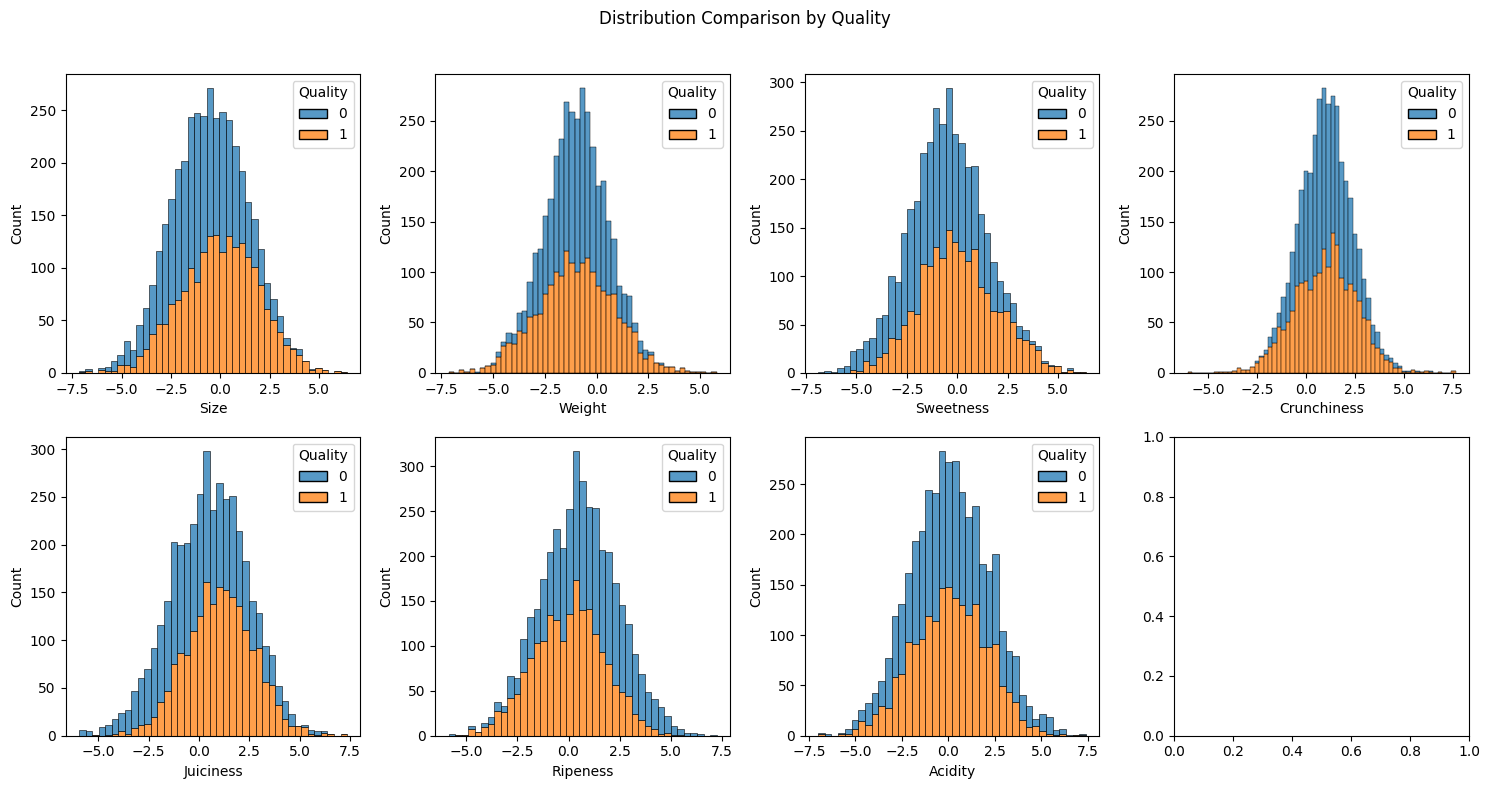

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for i, feature in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=feature, hue='Quality', multiple='stack', ax=axes[i // 4, i % 4])
    
plt.suptitle('Distribution Comparison by Quality')
plt.tight_layout(rect=[0, 0, 1, 0.96])

<Axes: >

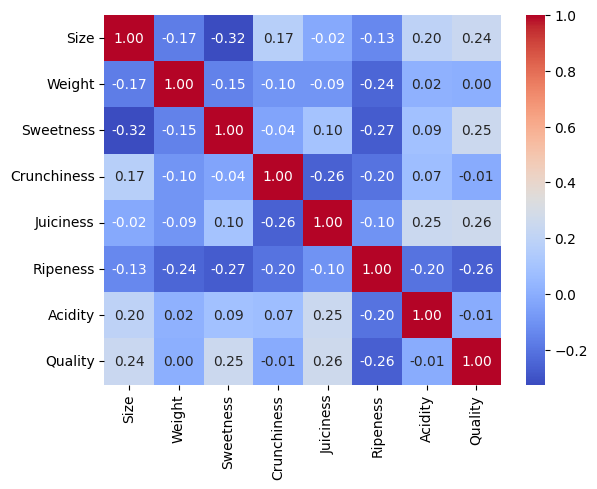

In [87]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [118]:
# Prepare features (X) and target variable (y)
df = df.sample(frac=1, random_state=42)
X = df.drop('Quality', axis=1)
y = df.Quality

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

In [119]:
# Models dictionary with classifiers
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier(max_iter=1000),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier())
    ], voting='soft')
}

Model: Random Forest
Accuracy: 0.8758333333333334
Precision: 0.8741721854304636
Recall: 0.8785357737104825
F1 Score: 0.8763485477178423


Model: Gradient Boosting
Accuracy: 0.8466666666666667
Precision: 0.8434925864909391
Recall: 0.8519134775374376
F1 Score: 0.847682119205298


Model: XGBoost
Accuracy: 0.8925
Precision: 0.9
Recall: 0.8835274542429284
F1 Score: 0.8916876574307305


Model: LightGBM
Accuracy: 0.8875
Precision: 0.8883333333333333
Recall: 0.8868552412645591
F1 Score: 0.88759367194005


Model: SVM
Accuracy: 0.885
Precision: 0.8917089678510999
Recall: 0.8768718801996672
F1 Score: 0.8842281879194631


Model: k-NN
Accuracy: 0.8925
Precision: 0.906896551724138
Recall: 0.8752079866888519
F1 Score: 0.890770533446232


Model: Decision Tree
Accuracy: 0.7875
Precision: 0.79421768707483
Recall: 0.7770382695507487
F1 Score: 0.7855340622371741


Model: AdaBoost
Accuracy: 0.7583333333333333
Precision: 0.7488
Recall: 0.778702163061564
F1 Score: 0.763458401305057


Model: Logistic Regressi

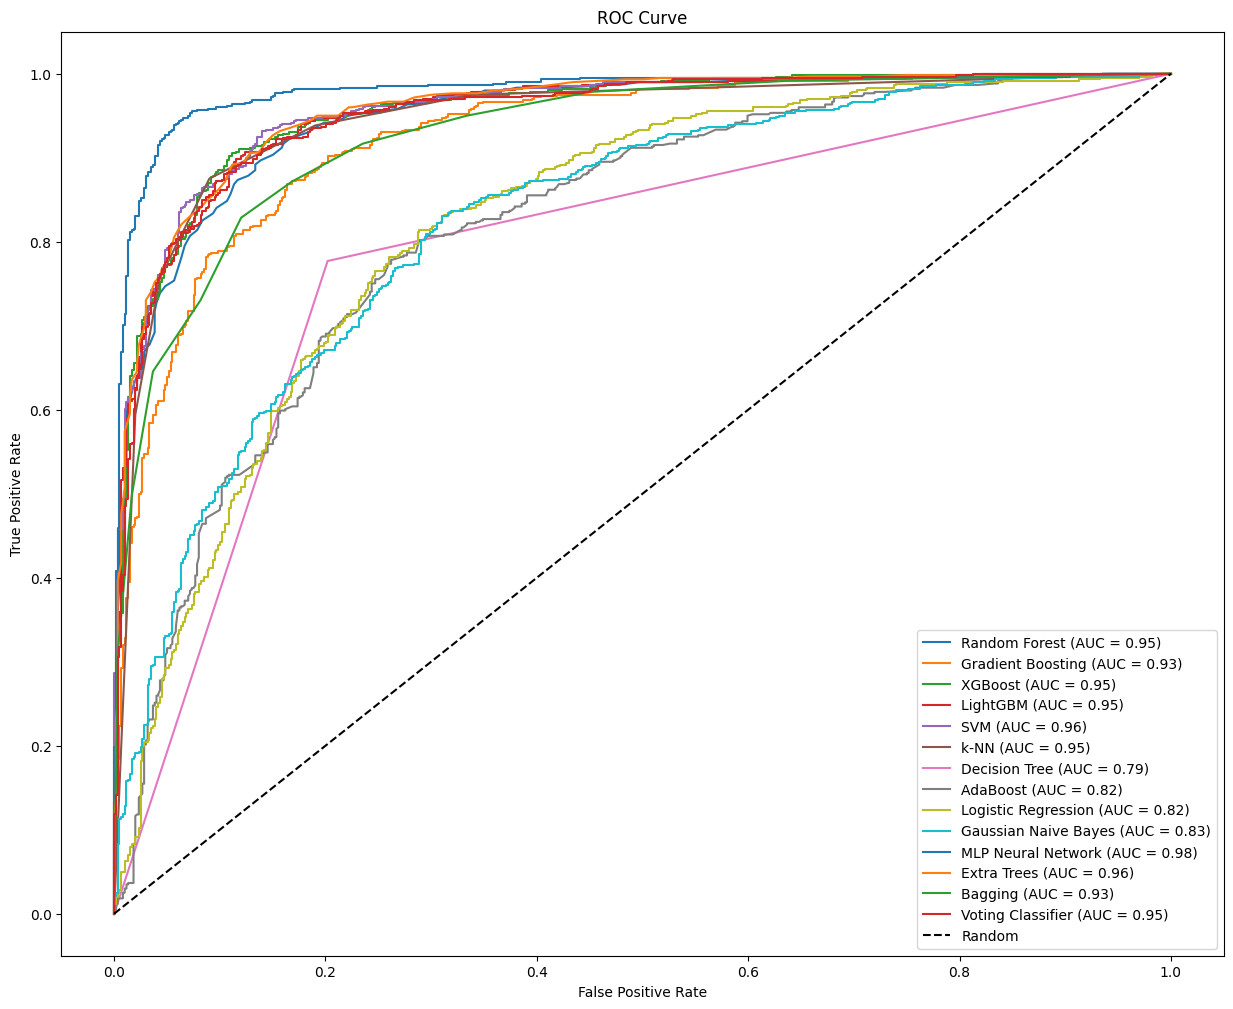

In [120]:
plt.figure(figsize=(15, 12))
# Print evaluation and plot ROC Curves for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()